# Data Cleaning

## Introduction

In this notebook, we will focus on preparing the dataset for further analysis and modeling by ensuring data quality and consistency. Data cleaning is a crucial step in any data science project, as it addresses potential issues that could adversely impact the performance of machine learning models and the reliability of insights derived from the data.

### Objectives
The primary goals of this notebook are to:
1. **Handle Missing Values**: Identify and address any missing data to ensure completeness.
2. **Outlier Treatment**: Detect and appropriately handle outliers that may distort the analysis or model predictions.
3. **Remove Duplicates**: Identify and eliminate any duplicate records to avoid redundancy and ensure data integrity.
4. **Validate Data Consistency**: Check for any inconsistencies in the data types, formats, or distributions.

### Importance
By performing these steps, we aim to:
- Enhance the quality of the dataset.
- Minimize potential biases and errors in the subsequent analysis.
- Lay a solid foundation for feature engineering and model development in the next phases of the project.

This notebook will result in a clean and reliable dataset that is ready for exploratory data analysis (EDA) and machine learning workflows.


In [32]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../medical_insurance_project/utils')
import missing_handler as mh
import data_explorer as de
import data_scaler as ds

## Data load and first visualization

In [33]:
path = '../medical_insurance_project/data/insurance.csv'

df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Looking for missing values

In [34]:
mh.missing_summary(df)

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
age,0,0,0,0,0,0,0,0,0,0,0
sex,0,0,0,0,0,0,0,0,0,0,0
bmi,0,0,0,0,0,0,0,0,0,0,0
children,0,0,0,0,0,0,0,0,0,0,0
smoker,0,0,0,0,0,0,0,0,0,0,0
region,0,0,0,0,0,0,0,0,0,0,0
charges,0,0,0,0,0,0,0,0,0,0,0


## Looking For Duplicates

In [35]:
print(f'The dataset contains {df.duplicated().sum()} duplicated values.')
df[df.duplicated()]

The dataset contains 1 duplicated values.


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [36]:
# Removing duplicated value
df = df.drop_duplicates()

## Looking for outliers

In [37]:
def find_outliers(df, feature):
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    
    # Creating Filters
    high_outliers = df[feature] > (Q3 + 1.5 * IQR)
    low_outliers = df[feature] < (Q1 - 1.5 * IQR)
    
    # Convining both filters
    outliers_df = df[high_outliers | low_outliers]
    
    return outliers_df

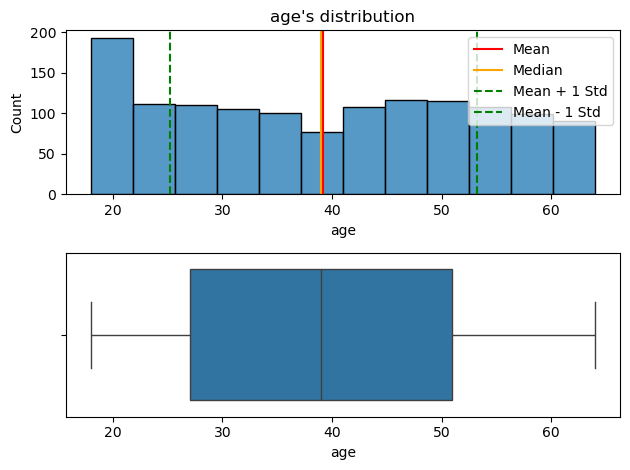

The 'age' feature contains 0 outliers


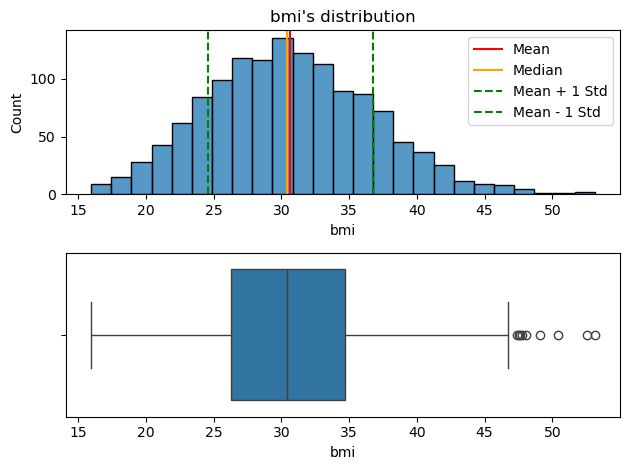

The 'bmi' feature contains 9 outliers


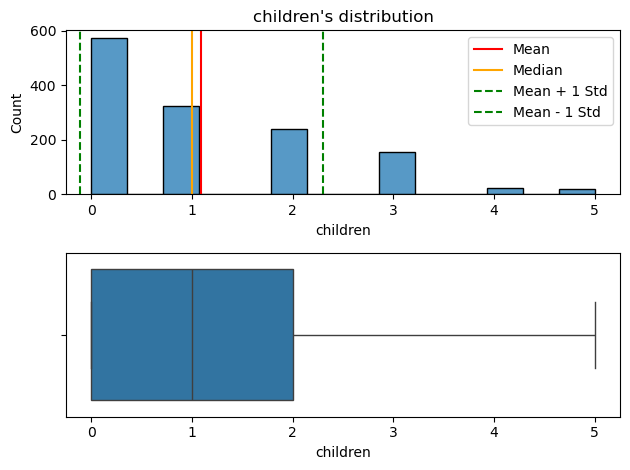

The 'children' feature contains 0 outliers


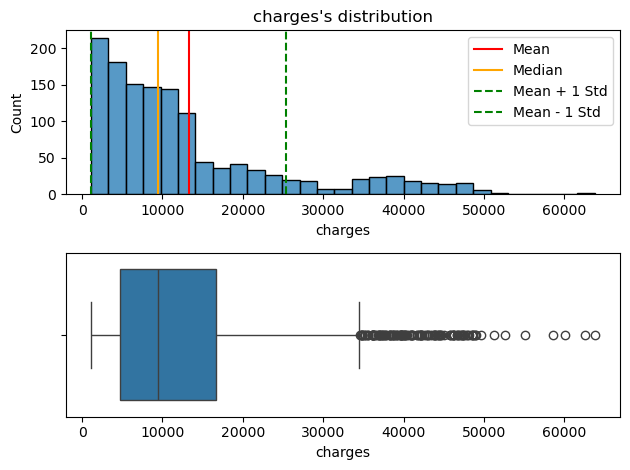

The 'charges' feature contains 139 outliers
['bmi', 'charges']


In [38]:
# identifying numerical feaures:
numerical_features = df.select_dtypes(include=np.number).columns

features_with_outliers = []

for col in numerical_features:
    de.numerical_dist(df, col)
    print(f"The '{col}' feature contains {find_outliers(df, col).shape[0]} outliers")
    if find_outliers(df, col).shape[0] != 0:
        features_with_outliers.append(col)
print(features_with_outliers)

# Handling Outliers in the Dataset

## Context

During the initial data analysis, an iterative method for outlier removal was applied using the interquartile range (IQR). This approach was helpful in identifying extreme values in the numerical variables and reducing their impact on the models.

However, after performing this iterative removal, we observed that the dataset size decreased by **17.4%**, dropping from 1338 to 1105 records. This data loss is significant, especially given that we are working with a relatively small dataset.

## Decision Made

Given the high percentage of data removed and to avoid losing valuable information, we have decided to adopt a different strategy for handling outliers. Instead of removing them, we will use models that are inherently **robust to outliers**.

## Alternative Approach

1. **Robust Regression Models**:
   - These models are designed to minimize the impact of outliers on predictions. Examples include:
     - **RANSAC Regression** (RANdom SAmple Consensus).
     - **Huber Regression**.

2. **Non-Parametric Models**:
   - Non-parametric models, such as decision trees and random forests, do not rely on strict assumptions about data distribution, making them ideal for naturally handling outliers.

## Conclusion

Instead of removing records with extreme values, which reduces the dataset size and can introduce bias, we have decided to employ **robust and non-parametric modeling techniques** to appropriately handle outliers without compromising data integrity. This approach ensures a better balance between preserving the data and achieving accurate model predictions.


## Saving the cleaned dataset into a csv file

In [39]:
df.to_csv('../medical_insurance_project/data/cleaned.csv', index=False)

In [40]:
# # Getting the initial number of records (Before removing outliers)
# initial_num_records = df.shape[0]

# while True:
#     initial_shape = df.shape[0] # Number of rows before the iteration
#     for col in numerical_features:
#         df = df.drop(find_outliers(df, col).index) # Removing outliers
#     if initial_shape == df.shape[0]:    # Condition to stop the while loop
#         break

# # Getting the Final number of records (After removing outliers)
# final_num_records = df.shape[0]
# print(f"Shape before removing outliers: {initial_num_records}\nShape after removing outliers: {final_num_records}")
# # Getting the porcentaje of removed data
# print(f'{(initial_num_records - final_num_records)/initial_num_records*100}% of the total data was removed.')